In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("C:/Users/Sunil Gupta/Desktop/internship/Datasets/task02 Dataset/fraudTrain.csv")
test_data = pd.read_csv("C:/Users/Sunil Gupta/Desktop/internship/Datasets/task02 Dataset/fraudTest.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
train_numericalData = train_data.select_dtypes(['int64','float64'])
test_numericalData = test_data.select_dtypes(['int64','float64'])


In [5]:
train_numericalData.isnull().sum()
test_numericalData.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [6]:
x_train = train_numericalData.drop(['Unnamed: 0','is_fraud'],axis=1)
y_train = train_numericalData[['is_fraud']]
x_test = test_numericalData.drop(['Unnamed: 0','is_fraud'],axis=1)
y_test = test_numericalData[['is_fraud']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train_minMax = min_max_scaler.fit_transform(x_train)
y_train_minMax = min_max_scaler.fit_transform(y_train)
x_test_minMax = min_max_scaler.fit_transform(x_test)
y_test_minMax = min_max_scaler.fit_transform(y_test)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', max_iter=100000)
model.fit(x_train_minMax,y_train_minMax)
y_pred = model.predict(x_test_minMax)
acc = accuracy_score(y_test_minMax, y_pred)
print(acc)


c:\Users\Sunil Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.995726257335092


In [9]:
predicted_vs_actual = y_test.copy()
y_pred = y_pred.astype(int)
predicted_vs_actual['predicted'] = y_pred.tolist()
predicted_vs_actual

,is_fraud,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555714,0,0
555715,0,0
555716,0,0
555717,0,0


In [10]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test_minMax,y_pred)

array([[553344,    230],
       [  2145,      0]], dtype=int64)

In [11]:
print(classification_report(y_test_minMax,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred_using_tree = clf.predict(x_test)

acc_tree = accuracy_score(y_test,pred_using_tree)
print(acc_tree)

0.988053314714811


In [13]:
df = y_test.copy()
df['predicted'] = pred_using_tree.tolist()
confusion_matrix(y_test,pred_using_tree)

array([[548521,   5053],
       [  1586,    559]], dtype=int64)

In [14]:
print(classification_report(y_test,pred_using_tree))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.10      0.26      0.14      2145

    accuracy                           0.99    555719
   macro avg       0.55      0.63      0.57    555719
weighted avg       0.99      0.99      0.99    555719



In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10,random_state=40, n_estimators=10)
rfc.fit(x_train, y_train)
pred_using_randomForest = rfc.predict(x_test)

acc_randomForest = accuracy_score(y_test,pred_using_randomForest)
print(acc_randomForest)

C:\Users\Sunil Gupta\AppData\Local\Temp\ipykernel_3828\1227249256.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.9960609588659016


In [16]:
confusion_matrix(y_test,pred_using_randomForest)

array([[553370,    204],
       [  1985,    160]], dtype=int64)

In [17]:
print(classification_report(y_test,pred_using_randomForest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.44      0.07      0.13      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.54      0.56    555719
weighted avg       0.99      1.00      0.99    555719



<Axes: >

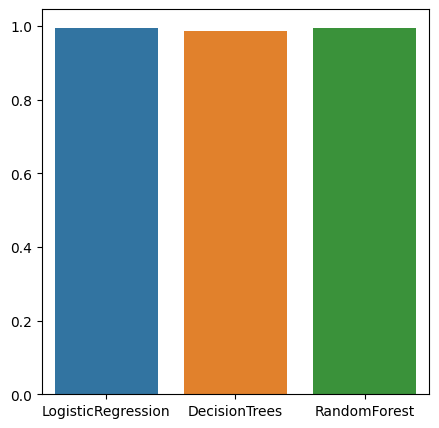

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
dictionary = {'LogisticRegression':acc, 'DecisionTrees':acc_tree, 'RandomForest':acc_randomForest}
sns.barplot(x=list(dictionary.keys()), y=list(dictionary.values()))